### Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("Churn.csv")

### Understanding the data

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
output = pandas_profiling.ProfileReport(data)

output.to_file(output_file='pandas_profiling.html')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
data[data.TotalCharges == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Data Manipulation

In [12]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan)

#convert to float type
data['TotalCharges'] = data['TotalCharges'].astype(float)

# missing value treatment
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [13]:
# replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1 : "Yes", 0 : "No"})

As we can see there are some variables like 'MultipleLines', 'MultipleLines', 'MultipleLines', etc which contain values like 'No internet service' & 'No phone service' means customer didn't opt for this service so we need to chanege these from 'No'

In [14]:
var = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in var : 
    data[i]  = data[i].replace({'No internet service' : 'No'})
    
data['MultipleLines']  = data['MultipleLines'].replace({'No phone service' : 'No'})

In [15]:
# Separating churn and non churn customers
not_churn = data[data["Churn"] == "No"]
churn = data[data["Churn"] == "Yes"]

In [16]:
# creating range of tenure
def tenure_range(data) :
    if data["tenure"] <= 12:
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    
    elif (data["tenure"] > 24) & (data["tenure"] <= 48):
        return "Tenure_24-48"
    
    elif (data["tenure"] > 48) & (data["tenure"] <= 60):
        return "Tenure_48-60"
    
    elif data["tenure"] > 60:
        return "Tenure_gt_60"
    
data["tenure"] = data.apply(lambda data:tenure_range(data), axis = 1)

In [17]:
# seperate categorical and continuous variables
conti_vars = data.loc[:, (data.dtypes == 'float64') | (data.dtypes == 'int64')]
cat_vars = data.loc[:, (data.dtypes == 'object')]

### Data Visualization

In [18]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [19]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [20]:
conti_vars.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
MonthlyCharges,7043.0,0.0,4.561166e+05,64.761692,70.35,30.090047,9.054109e+02,18.25,19.2,19.65,20.05,35.500,70.35,89.85,102.60,107.400,114.729,118.75
TotalCharges,7043.0,0.0,1.608129e+07,2283.300441,1400.55,2265.000258,5.130226e+06,18.80,19.9,49.65,84.61,402.225,1400.55,3786.60,5973.69,6921.025,8039.256,8684.80


In [21]:
cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
customerID,7043,0,0248-PGHBZ,1,0.01
gender,7043,0,Male,3555,50.48
SeniorCitizen,7043,0,No,5901,83.79
Partner,7043,0,No,3641,51.7
Dependents,7043,0,No,4933,70.04
tenure,7043,0,Tenure_0-12,2186,31.04
PhoneService,7043,0,Yes,6361,90.32
MultipleLines,7043,0,No,4072,57.82
InternetService,7043,0,Fiber optic,3096,43.96
OnlineSecurity,7043,0,No,5024,71.33


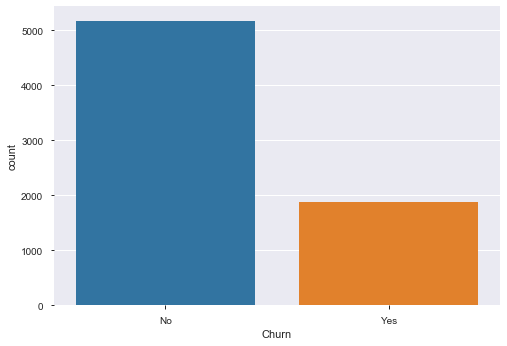

In [22]:
sns.countplot(cat_vars.Churn)
plt.show()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64


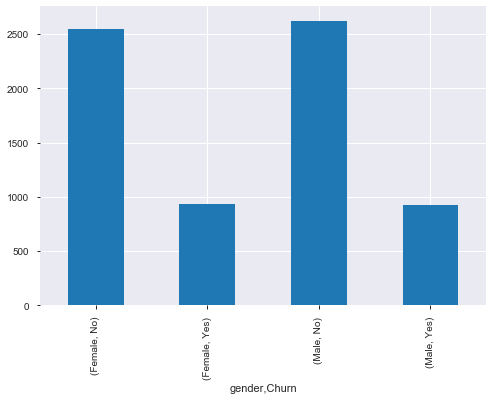

In [23]:
a = data.groupby(['gender', 'Churn'])['Churn'].count()
print(a)

a.plot.bar()
plt.show()

SeniorCitizen  Churn
No             No       4508
               Yes      1393
Yes            No        666
               Yes       476
Name: Churn, dtype: int64


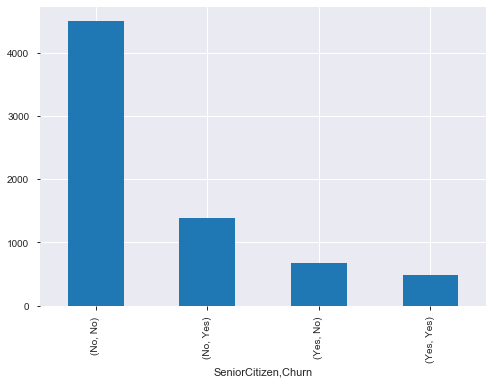

In [24]:
b = data.groupby(['SeniorCitizen', 'Churn'])['Churn'].count()
print(b)

b.plot.bar()
plt.show()

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64


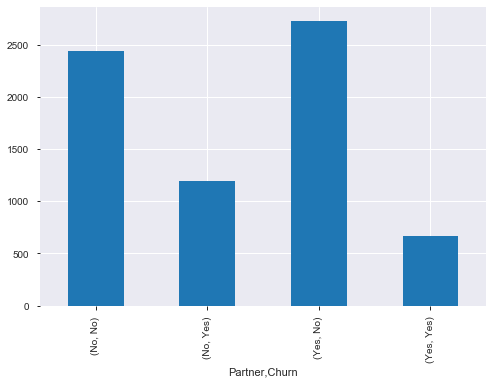

In [25]:
c = data.groupby(['Partner', 'Churn'])['Churn'].count()
print(c)

c.plot.bar()
plt.show()

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64


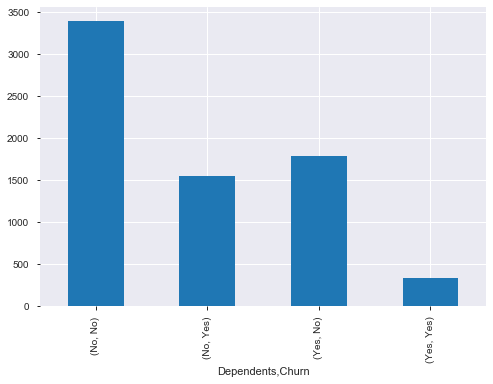

In [26]:
d = data.groupby(['Dependents', 'Churn'])['Churn'].count()
print(d)

d.plot.bar()
plt.show()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64


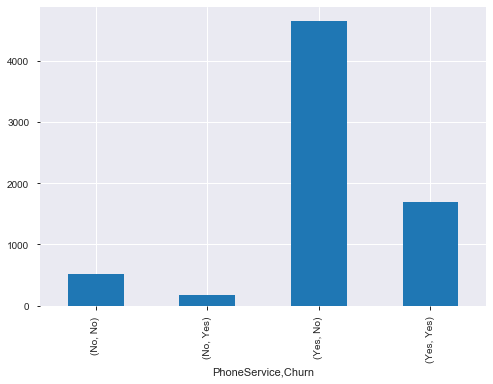

In [27]:
e = data.groupby(['PhoneService', 'Churn'])['Churn'].count()
print(e)

e.plot.bar()
plt.show()

MultipleLines  Churn
No             No       3053
               Yes      1019
Yes            No       2121
               Yes       850
Name: Churn, dtype: int64


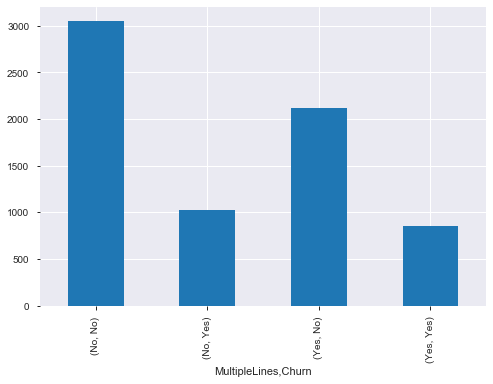

In [28]:
f = data.groupby(['MultipleLines', 'Churn'])['Churn'].count()
print(f)

f.plot.bar()
plt.show()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64


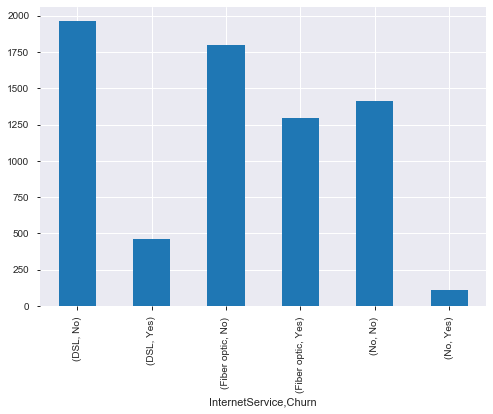

In [29]:
g = data.groupby(['InternetService', 'Churn'])['Churn'].count()
print(g)

g.plot.bar()
plt.show()

OnlineSecurity  Churn
No              No       3450
                Yes      1574
Yes             No       1724
                Yes       295
Name: Churn, dtype: int64


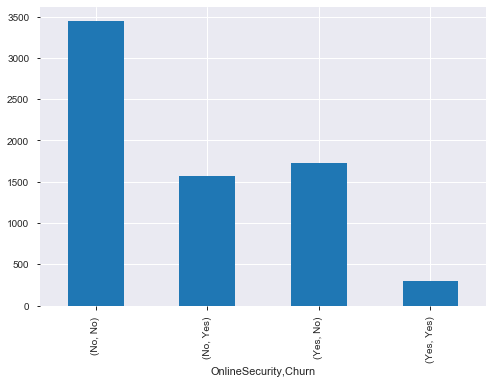

In [30]:
h = data.groupby(['OnlineSecurity', 'Churn'])['Churn'].count()
print(h)

h.plot.bar()
plt.show()

DeviceProtection  Churn
No                No       3297
                  Yes      1324
Yes               No       1877
                  Yes       545
Name: Churn, dtype: int64


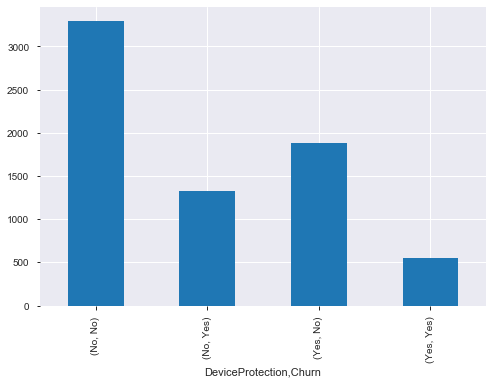

In [31]:
i = data.groupby(['DeviceProtection', 'Churn'])['Churn'].count()
print(i)

i.plot.bar()
plt.show()

TechSupport  Churn
No           No       3440
             Yes      1559
Yes          No       1734
             Yes       310
Name: Churn, dtype: int64


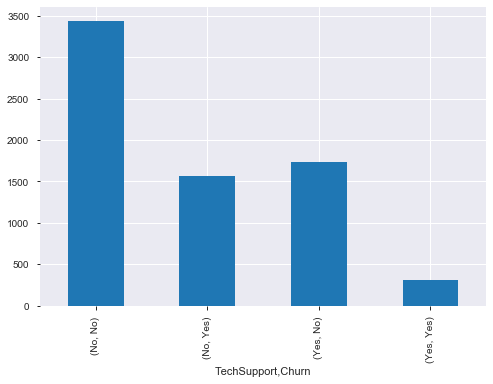

In [32]:
j = data.groupby(['TechSupport', 'Churn'])['Churn'].count()
print(j)

j.plot.bar()
plt.show()

StreamingTV  Churn
No           No       3281
             Yes      1055
Yes          No       1893
             Yes       814
Name: Churn, dtype: int64


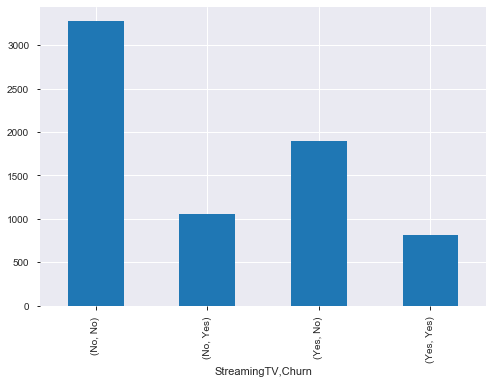

In [33]:
k = data.groupby(['StreamingTV', 'Churn'])['Churn'].count()
print(k)

k.plot.bar()
plt.show()

StreamingMovies  Churn
No               No       3260
                 Yes      1051
Yes              No       1914
                 Yes       818
Name: Churn, dtype: int64


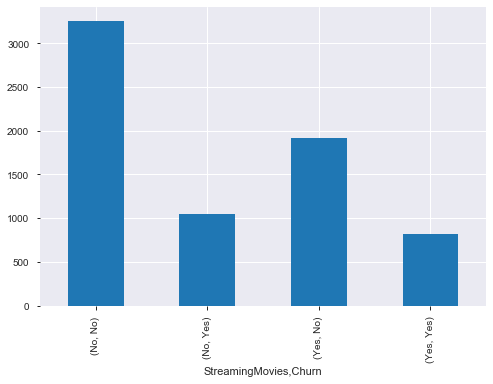

In [34]:
l = data.groupby(['StreamingMovies', 'Churn'])['Churn'].count()
print(l)

l.plot.bar()
plt.show()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64


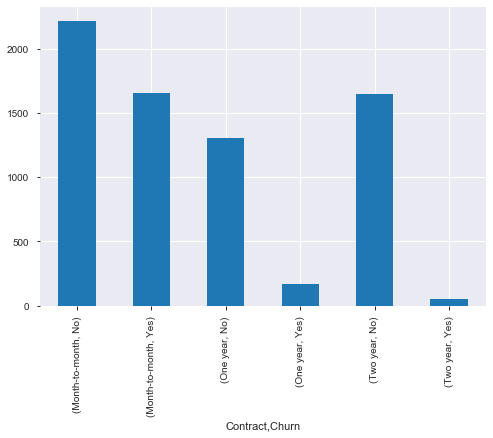

In [35]:
m = data.groupby(['Contract', 'Churn'])['Churn'].count()
print(m)

m.plot.bar()
plt.show()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64


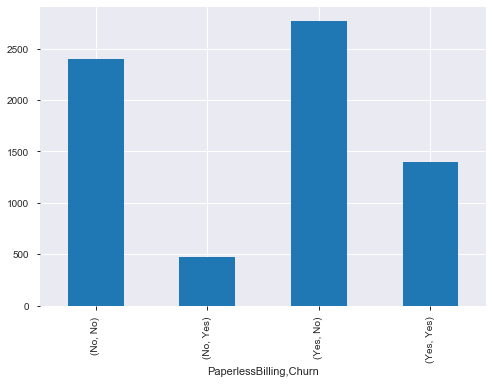

In [36]:
n = data.groupby(['PaperlessBilling', 'Churn'])['Churn'].count()
print(n)

n.plot.bar()
plt.show()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: Churn, dtype: int64


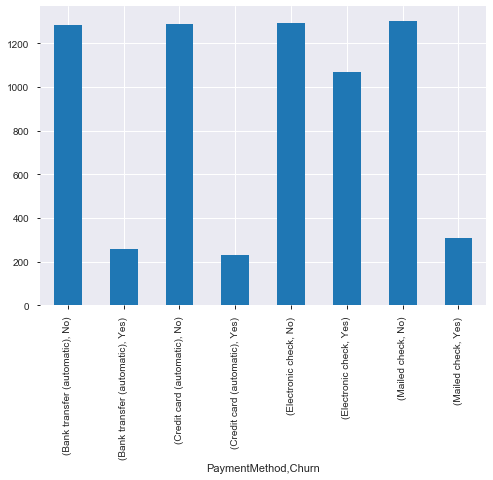

In [37]:
o = data.groupby(['PaymentMethod', 'Churn'])['Churn'].count()
print(o)

o.plot.bar()
plt.show()

tenure        Churn
Tenure_0-12   No       1149
              Yes      1037
Tenure_12-24  No        730
              Yes       294
Tenure_24-48  No       1269
              Yes       325
Tenure_48-60  No        712
              Yes       120
Tenure_gt_60  No       1314
              Yes        93
Name: Churn, dtype: int64


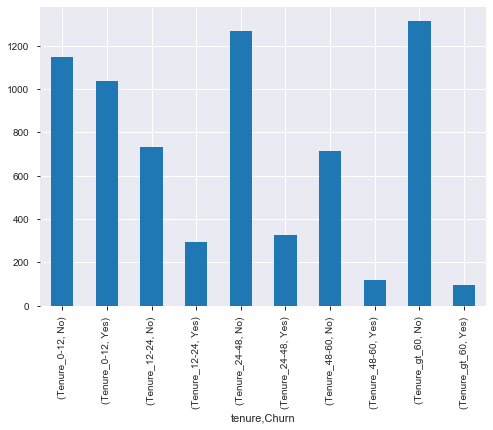

In [38]:
p = data.groupby(['tenure', 'Churn'])['Churn'].count()
print(p)

p.plot.bar()
plt.show()

### Conclusion: From the above visualiztions we can observed that:-

- Gender doesn't play any role in prediction Churn
- Senior Citizens are less likely of leaving the company, still not substantially significant.
- Having Partner doesn't make any difference.
- Those who don't have Dependents more likely to leave.
- Having a PhoneService increases the likelihood of living the company.
- Multilines doesn't have that much impact as compair to PhoneService
- Those who doesn't have InternetService are less likely to leave.
- Those who doesn't have OnlineSecurity are more likely to leave.
- Those who doesn't have DeviceProtection are more likely to leave.
- Those who doesn't have TechSupport are more likely to leave.
- Having StreamingTV, StreamingMovies services doesn't make any difference.
- Those who have Month-to-month Contract are more likely to leave.
- Those who have PaperlessBilling and Electronic check PaymentMethod are more likely to leave.
- Tenure between 0-12 are more likely to leave compair to others.

### Data preprocessing

In [39]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [40]:
bins = data.nunique()[data.nunique() == 2].keys().tolist()

In [41]:
dummies = [i for i in cat_vars.columns.difference(['customerID']) if i not in bins]

In [42]:
le = LabelEncoder()

In [43]:
# creating bins
for i in bins:
    data[i] = le.fit_transform(data[i])

In [44]:
# creating dummies
data = create_dummies(data, dummies)

In [45]:
sc = StandardScaler()
scaled_data = sc.fit_transform(conti_vars)
scaled_data = pd.DataFrame(scaled_data, columns = conti_vars.columns)

In [46]:
data = data.drop(columns = conti_vars.columns, axis = 1)
data = data.merge(scaled_data, left_index =True, right_index = True, how = "left")

In [47]:
# removing customerID variable from data
x = data.columns.difference(['customerID'])
data = data[x]

In [48]:
data.shape

(7043, 27)

In [49]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = data.corr()
corrm.to_csv('corrm.csv')

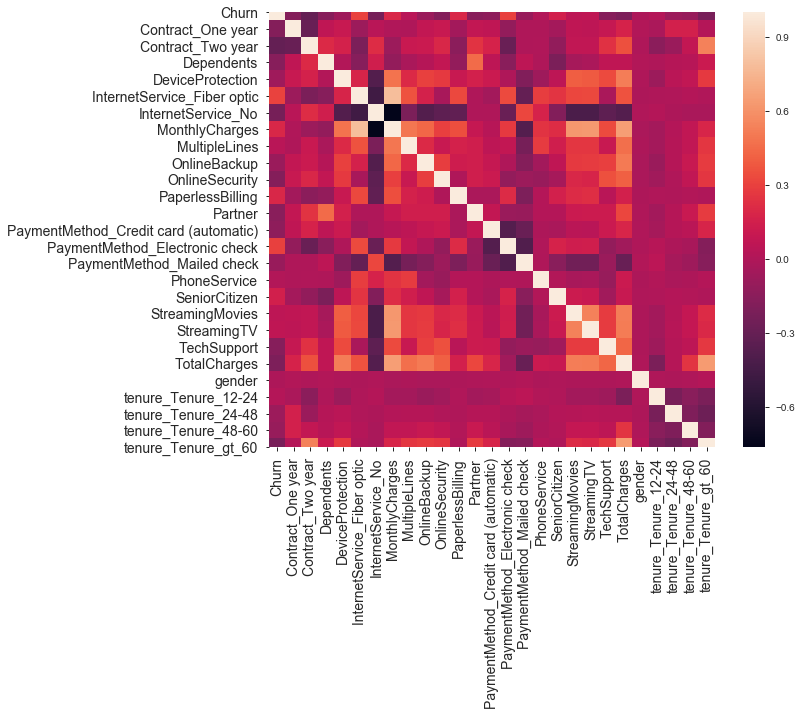

In [50]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
plt.tick_params(labelsize = 14)
sns.heatmap(corrm)
plt.show()

In [51]:
# # Taking the features which may have high infulane on churn
# var_list = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity' ,  
#             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

### Implement Machine Learning Models

### Variable Reduction Using RFE (Recursive Feature Elimination)

In [52]:
target = data['Churn']
new_data = data[data.columns.difference(['Churn'])]

In [53]:
import warnings
warnings.filterwarnings("ignore") #ignore ConvergenceWarning

rfe = RFE(LogisticRegression(), 15).fit(new_data, target)
rfe.ranking_

array([ 1,  1,  7,  9,  1,  1,  5,  1,  6,  1,  1, 10,  8,  1, 12,  1,  4,
        1,  3,  1,  2, 11,  1,  1,  1,  1])

In [54]:
a = pd.DataFrame({'Features' : list(new_data.columns),
              'Ranking'  : rfe.ranking_})
ranked_rfe = a.sort_values(by = 'Ranking')
ranked_rfe[ranked_rfe.Ranking == 1]

,Features,Ranking
0,Contract_One year,1
23,tenure_Tenure_24-48,1
22,tenure_Tenure_12-24,1
19,TechSupport,1
17,StreamingMovies,1
15,PhoneService,1
13,PaymentMethod_Electronic check,1
24,tenure_Tenure_48-60,1
10,PaperlessBilling,1
25,tenure_Tenure_gt_60,1


In [55]:
rfe_var = new_data.columns[rfe.support_].tolist()

### Variable Reduction Using Select K-Best Technique

In [56]:
k_best = SelectKBest(f_classif, k = 15).fit(new_data, target)

In [57]:
b = pd.DataFrame({'Features' : new_data.columns,
                  'Scores'   : k_best.scores_})
b.sort_values(by = 'Scores', ascending = False)[:15].round()

,Features,Scores
4,InternetService_Fiber optic,738.0
1,Contract_Two year,708.0
13,PaymentMethod_Electronic check,706.0
5,InternetService_No,386.0
25,tenure_Tenure_gt_60,377.0
20,TotalCharges,292.0
6,MonthlyCharges,273.0
10,PaperlessBilling,269.0
0,Contract_One year,230.0
9,OnlineSecurity,213.0


In [58]:
kbest_var = new_data.columns[k_best.get_support()].tolist()

In [59]:
var = ['Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines', 'OnlineSecurity',
 'PaperlessBilling', 'PaymentMethod_Electronic check', 'PhoneService', 'StreamingMovies', 'TechSupport', 'tenure_Tenure_12-24',
 'tenure_Tenure_24-48', 'tenure_Tenure_48-60', 'tenure_Tenure_gt_60', 'PaymentMethod_Credit card (automatic)', 'TotalCharges',
 'MonthlyCharges', 'Dependents', 'SeniorCitizen', 'Partner']

In [60]:
nwe_data = new_data[var]
new_data['Churn'] = data['Churn']

### Final variables after feature selection
'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines', 'OnlineSecurity',
       'PaperlessBilling', 'PaymentMethod_Electronic check', 'PhoneService',
       'StreamingMovies', 'TechSupport', 'tenure_Tenure_12-24',
       'tenure_Tenure_24-48', 'tenure_Tenure_48-60', 'tenure_Tenure_gt_60',
       'Dependents', 'MonthlyCharges', 'Partner',
       'PaymentMethod_Credit card (automatic)', 'SeniorCitizen',
       'TotalCharges'

In [61]:
train, test = train_test_split(new_data, test_size = 3043, random_state = 123)

In [62]:
train_X = train[train.columns.difference(['Churn'])]
train_y = train['Churn']

test_X = test[test.columns.difference(['Churn'])]
test_y = test['Churn']

## Logistic Regression Model 

In [63]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': logreg.predict(test_X)})

In [65]:
hr_test_pred = hr_test_pred.reset_index()

In [66]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
1598,1811,0,1
26,3408,1,0
467,653,0,0
2816,2237,0,0
2964,2764,0,0
337,6848,0,0
1578,2641,0,0
2181,5814,0,0
170,317,1,0
1117,7025,0,0


In [67]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                            hr_test_pred.predicted, [1,0] )
cm

array([[ 406,  413],
       [ 198, 2026]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

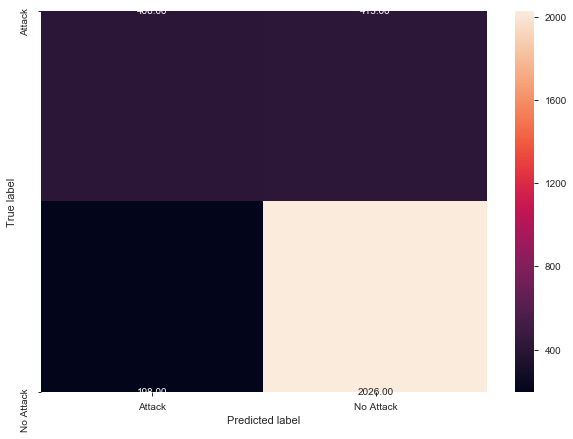

In [68]:
plt.rcParams["figure.figsize"] = (10,7)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "No Attack"] , yticklabels = ["Attack", "No Attack"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [69]:
logreg.score(train_X, train_y)

0.8065

### RidgeClassifier

In [70]:
from sklearn.linear_model import RidgeClassifier

In [71]:
rigclf = RidgeClassifier().fit(train_X, train_y)

In [72]:
#Predicting the test cases
hr_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': rigclf.predict(test_X)})

In [73]:
hr_test_pred = hr_test_pred.reset_index()

In [74]:
#Comparing the predictions with actual test data
hr_test_pred.sample(n = 10)

,index,actual,predicted
496,1446,0,1
1912,238,1,1
2216,2930,0,0
2900,1013,0,0
2559,6435,0,0
249,3307,0,0
2246,5756,0,0
1275,4872,0,0
554,3553,0,0
101,3515,0,0


In [75]:
rigclf.score(train_X, train_y)

0.80625

In [76]:
rigclf.score(test_X, test_y)

0.7939533355241538

#### check model accuracy

In [77]:
train_predict = rigclf.predict(train_X)
test_predict = rigclf.predict(test_X)

In [78]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7042534301856337
The AUC for the model built on the Test Data is :  0.6874099621401779


## Decision Tree Model

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
dt = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 10 )
dt.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
print(metrics.classification_report(train_y, dt.predict(train_X)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2950
           1       0.68      0.48      0.56      1050

    accuracy                           0.80      4000
   macro avg       0.76      0.70      0.72      4000
weighted avg       0.79      0.80      0.79      4000



In [82]:
print(metrics.classification_report(test_y, dt.predict(test_X)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      2224
           1       0.66      0.44      0.53       819

    accuracy                           0.79      3043
   macro avg       0.74      0.68      0.70      3043
weighted avg       0.78      0.79      0.77      3043



In [83]:
# Using Gridsearch, tuning the parameters
param_grid = {'max_depth': np.arange(5, 10), 'max_features': np.arange(5, 10)}

In [84]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit(train_X, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8, 9])},
        

In [85]:
tree.best_params_

{'max_depth': 6, 'max_features': 5}

In [86]:
tree.best_score_

0.78475

### Building Final Decision Tree Model

In [87]:
dt_tree = DecisionTreeClassifier(max_depth = 7 , max_leaf_nodes = 9)
dt_tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
tree_test_pred = pd.DataFrame({'actual' : test_y,
                             'predicted': dt_tree.predict(test_X)})

In [89]:
tree_test_pred.sample( n = 10 )

,actual,predicted
5765,1,0
6378,1,1
131,1,0
6760,1,0
6543,0,0
1765,0,0
4551,0,0
159,0,0
814,0,0
4316,0,0


In [90]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
tree_cm

array([[ 364,  186],
       [ 455, 2038]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

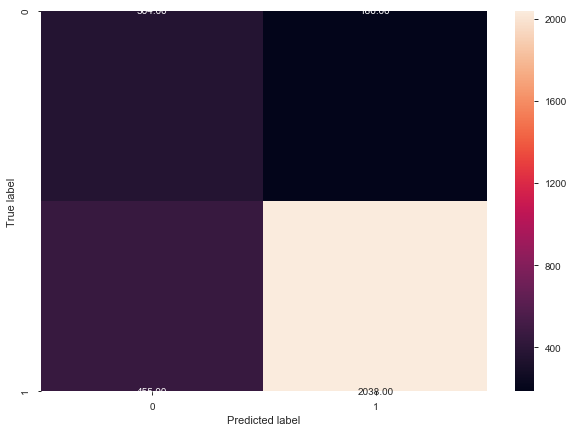

In [91]:
sns.heatmap(tree_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [92]:
#Train Accuracy
metrics.accuracy_score(train_y, dt_tree.predict(train_X))

0.804

In [93]:
#Test Accuracy
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted )

0.7893526125534013

#### check model accuracy

In [94]:
train_predict = dt_tree.predict(train_X)
test_predict = dt_tree.predict(test_X)

In [95]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.6993543179983859
The AUC for the model built on the Test Data is :  0.6804056754596323


## K-Nearest Neighbor Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [98]:
KNN.score(train_X, train_y)

0.8685

In [99]:
# Using Gridsearch, tuning the parameters
tuned_parameters = [{'n_neighbors': [2,3,5]}]

KNN = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv = 5)

In [100]:
KNN.fit(train_X, train_y)

KNN.best_score_

0.76825

In [101]:
KNN.best_params_

{'n_neighbors': 5}

### Building Final K-Nearest Neighbor Model

In [102]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [103]:
KNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
KNN_cm = metrics.confusion_matrix(test_y, KNN.predict(test_X))
KNN_cm

array([[1898,  326],
       [ 393,  426]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

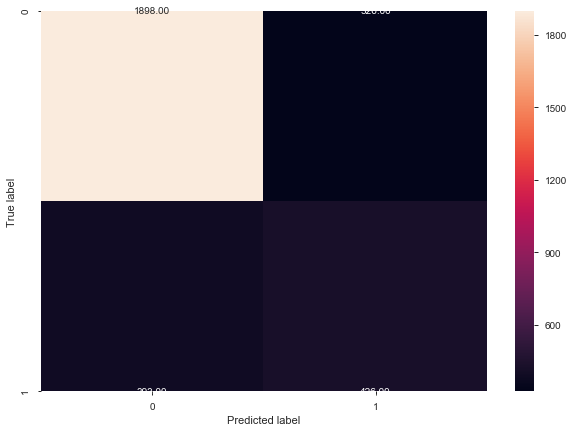

In [105]:
sns.heatmap(KNN_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [106]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(test_y, KNN.predict(test_X)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2224
           1       0.57      0.52      0.54       819

    accuracy                           0.76      3043
   macro avg       0.70      0.69      0.69      3043
weighted avg       0.76      0.76      0.76      3043



In [107]:
KNN.score(train_X, train_y)

0.838

In [108]:
KNN.score(test_X, test_y)

0.7637200131449228

#### check model accuracy

In [109]:
train_predict = KNN.predict(train_X)
test_predict = KNN.predict(test_X)

In [110]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7748506860371266
The AUC for the model built on the Test Data is :  0.6867818931667853


## Random Forest Model

In [111]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth = 5, n_estimators = 20, random_state = 345)
RF.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=345,
                       verbose=0, warm_start=False)

In [112]:
RF.score(train_X, train_y)

0.8035

In [113]:
pargrid_rf = {'n_estimators': (10, 20, 22, 24, 26, 40, 50, 60), 'max_depth': range(5, 15)}

In [114]:
gscv_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                       param_grid = pargrid_rf, 
                       cv = 5, 
                       verbose = 0, 
                       n_jobs = -1)
    
gscv_result = gscv_rf.fit(train_X, train_y)

In [115]:
gscv_result.best_params_

{'max_depth': 8, 'n_estimators': 24}

In [116]:
gscv_rf.best_score_

0.80225

### Final Random Forest Model

In [117]:
RF = RandomForestClassifier(max_depth = 8, n_estimators = 24, random_state = 0, n_jobs = -1)  
RF.fit(train_X, train_y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [118]:
RF_cm = metrics.confusion_matrix(test_y, RF.predict(test_X))
RF_cm

array([[2045,  179],
       [ 428,  391]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

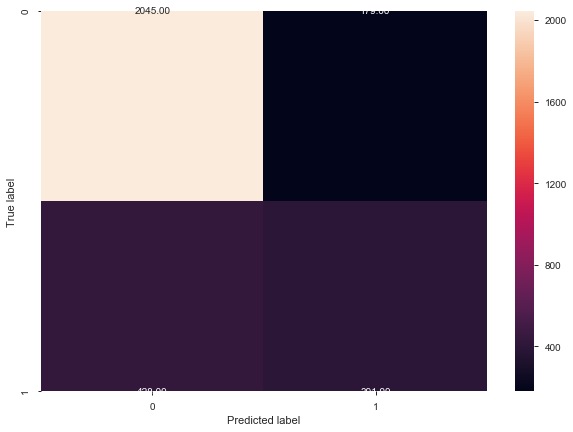

In [119]:
sns.heatmap(RF_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [120]:
RF.score(train_X, train_y)

0.8375

In [121]:
RF.score(test_X, test_y)

0.8005257969109432

#### check model accuracy

In [122]:
train_predict = RF.predict(train_X)
test_predict = RF.predict(test_X)

In [123]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7490556900726392
The AUC for the model built on the Test Data is :  0.698462932950343


## Naive Bayes Model

- GaussianNB ->	 When independent variables include continous
- BernoulliNB -> When data consists of binary categorical independent vars

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [125]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [126]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[1639,  585],
       [ 198,  621]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

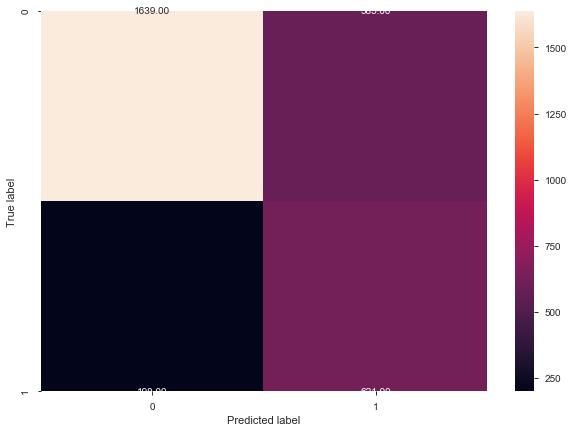

In [127]:
sns.heatmap(nb_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [128]:
nb_clf.score(train_X, train_y)

0.74525

In [129]:
nb_clf.score(test_X, test_y)

0.7426881367071968

#### check model accuracy

In [130]:
train_predict = nb_clf.predict(train_X)
test_predict = nb_clf.predict(test_X)

In [131]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7595076674737693
The AUC for the model built on the Test Data is :  0.7476010949482172


#### BernoulliNB

In [132]:
nb_clf = BernoulliNB()
nb_clf.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [133]:
nb_cm = metrics.confusion_matrix(test_y, nb_clf.predict(test_X) )
nb_cm

array([[1821,  403],
       [ 274,  545]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

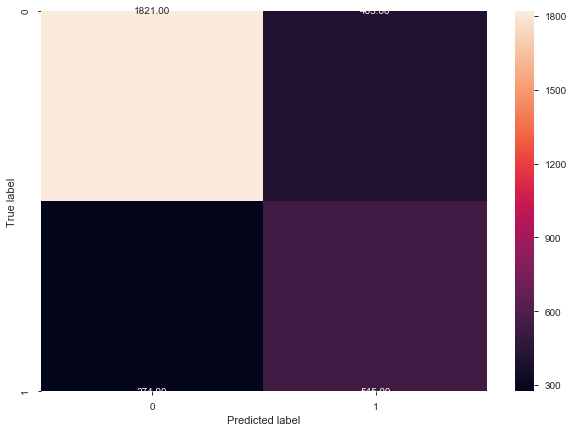

In [134]:
sns.heatmap(nb_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [135]:
nb_clf.score(train_X, train_y)

0.776

In [136]:
nb_clf.score(test_X, test_y)

0.7775221820571804

#### check model accuracy

In [137]:
train_predict = nb_clf.predict(train_X)
test_predict = nb_clf.predict(test_X)

In [138]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7417110573042776
The AUC for the model built on the Test Data is :  0.7421203147372211


## Support Vector Machine Model

In [139]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel = 'rbf', class_weight = 'balanced', gamma = 'scale')

In [140]:
model.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [141]:
param_grid = {'C': [3, 4, 5, 6, 7, 8],
              'gamma': [0.00001, 0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3, 4, 5, 6, 7, 8],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
grid.best_params_

{'C': 6, 'gamma': 0.0001}

In [143]:
grid.best_score_

0.7565

In [144]:
svc = SVC(C = 6, gamma = 0.0001)
svc.fit(train_X, train_y)

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [145]:
svc_cm = metrics.confusion_matrix(test_y, svc.predict(test_X))
svc_cm

array([[2224,    0],
       [ 819,    0]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

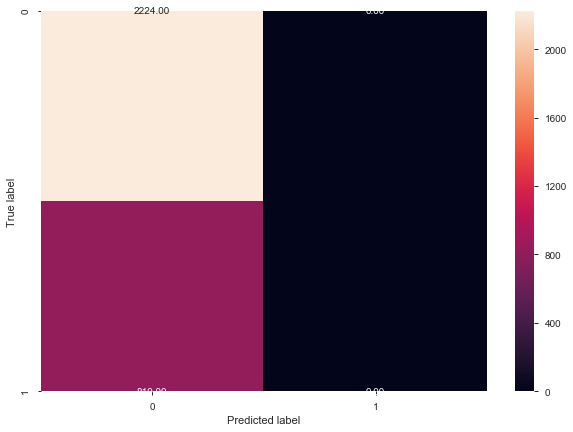

In [146]:
sns.heatmap(svc_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [147]:
svc.score(train_X, train_y)

0.7375

In [148]:
svc.score(test_X, test_y)

0.730857706210976

#### check model accuracy

In [149]:
train_predict = svc.predict(train_X)
test_predict = svc.predict(test_X)

In [150]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.5
The AUC for the model built on the Test Data is :  0.5


## XGBOOST

In [151]:
from xgboost import XGBClassifier

In [152]:
xgb = XGBClassifier(objective = 'binary:logistic')
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
para = {'n_estimators': [10, 20, 30, 40, 50],
            'learning_rate': [0.03, 0.1, 0.2, 0.3, 0.4], 
            'max_depth': [2, 3, 4]}

In [154]:
xgb = XGBClassifier(objective = 'binary:logistic')

xgb_grid = GridSearchCV(xgb, para, cv = 2, n_jobs = -1, verbose = True)
grid_result = xgb_grid.fit(train_X, train_y)

Fitting 2 folds for each of 75 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.6s finished


In [155]:
xgb_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30}

### Final XGBoost Model

In [156]:
xgb = XGBClassifier(n_estimators = 30, learning_rate = 0.2, max_depth = 2, objective = 'binary:logistic')
xgb.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [157]:
xgb_cm = metrics.confusion_matrix(test_y, xgb.predict(test_X))
xgb_cm

array([[2046,  178],
       [ 428,  391]], dtype=int64)

Text(0.5, 39.5, 'Predicted label')

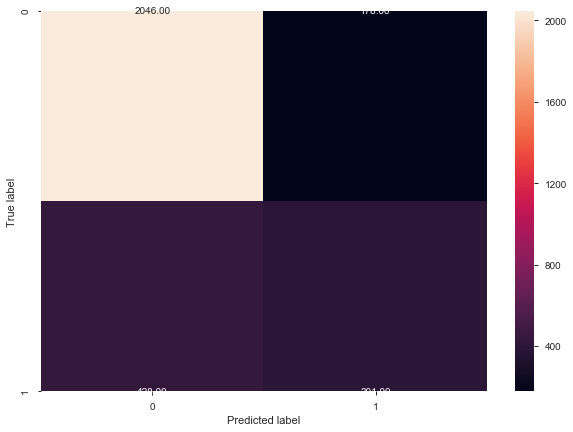

In [158]:
sns.heatmap(xgb_cm, annot = True, fmt = '.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [159]:
xgb.score(train_X, train_y)

0.81375

In [160]:
xgb.score(test_X, test_y)

0.8008544199802826

#### check model accuracy

In [161]:
train_predict = xgb.predict(train_X)
test_predict = xgb.predict(test_X)

In [162]:
# model accuracy 
train_auc = metrics.roc_auc_score(train_y, train_predict)
test_auc = metrics.roc_auc_score(test_y, test_predict)

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.7173123486682809
The AUC for the model built on the Test Data is :  0.6986877530942279


### Model Evaluation

### Applyting PCA

In [163]:
from sklearn.decomposition import PCA

In [164]:
pc = PCA(n_components = 27)

In [165]:
pc.fit(data)

PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [166]:
#Eigen values
sum(pc.explained_variance_)

6.846799812068541

In [167]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pc.explained_variance_ratio_, decimals = 4)*100)
var1

array([ 35.3 ,  47.66,  52.23,  56.3 ,  59.96,  63.54,  66.78,  69.82,
        72.71,  75.49,  78.11,  80.39,  82.51,  84.59,  86.57,  88.51,
        90.35,  92.17,  93.78,  95.2 ,  96.51,  97.64,  98.45,  99.21,
        99.84, 100.  , 100.01])

number of components have choosen as 10 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [168]:
pc_final = PCA(n_components = 10).fit(data)

In [169]:
reduced_cr = pc_final.fit_transform(data)  # the out put is Factors (F1, F2, ...F9)

In [170]:
dimensions = pd.DataFrame(reduced_cr)

dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10"]

dimensions.head(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-1.496785,0.211043,0.137372,0.458777,-0.512195,-0.508638,-1.141851,-0.002094,0.785502,0.034934
1,-0.649797,-0.347298,1.141933,-0.079247,0.611608,0.966019,0.417207,-0.466140,0.125146,-0.179161
2,-1.090365,0.505916,0.761366,-0.255380,0.435722,-0.389380,0.405174,0.368602,0.928262,0.474211
3,-0.740100,-0.621938,1.582065,0.061101,0.590613,0.589901,-0.321435,-0.222485,0.122698,-0.649839
4,-0.669414,1.613644,-0.180904,-0.172999,-0.522058,-0.329465,-0.187552,0.079401,0.250692,-0.052440
5,0.833930,1.857916,-0.102818,-0.047076,-0.489908,-0.345940,0.078621,-0.205776,-0.753169,0.004879
6,0.625023,0.608627,-0.319290,0.033023,0.431416,0.140622,0.638532,1.153660,0.204250,0.101137
7,-1.815598,-0.247915,0.939724,-0.301554,-0.501321,-0.168061,0.346534,-0.333685,0.406378,-0.008599
8,1.704708,1.133371,-0.112519,0.594612,-0.477163,0.070682,-0.105067,-0.244643,-0.776220,-0.223029
9,-0.069164,-1.044757,0.414185,-0.048087,0.552981,0.288604,0.002576,-0.188542,1.054934,-0.146335


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [171]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T, columns = data.columns).T

In [172]:
Loadings.to_csv("Loadings.csv")

### Clustering 

In [173]:
data.columns

Index(['Churn', 'Contract_One year', 'Contract_Two year', 'Dependents',
       'DeviceProtection', 'InternetService_Fiber optic', 'InternetService_No',
       'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
       'PaperlessBilling', 'Partner', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
       'TechSupport', 'TotalCharges', 'gender', 'tenure_Tenure_12-24',
       'tenure_Tenure_24-48', 'tenure_Tenure_48-60', 'tenure_Tenure_gt_60'],
      dtype='object')

In [174]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['Contract_One year', 'Contract_Two year', 'PaperlessBilling', 'PaymentMethod_Credit card (automatic)',
            'TechSupport', 'StreamingTV', 'Dependents', 'InternetService_Fiber optic', 'MonthlyCharges', 'OnlineSecurity',
            'OnlineBackup', 'InternetService_No', 'SeniorCitizen']

In [175]:
clu_data = data[list_var]
clu_data.head()

,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Credit card (automatic),TechSupport,StreamingTV,Dependents,InternetService_Fiber optic,MonthlyCharges,OnlineSecurity,OnlineBackup,InternetService_No,SeniorCitizen
0,0,0,1,0,0,0,0,0,-1.160323,0,1,0,0
1,1,0,0,0,0,0,0,0,-0.259629,1,0,0,0
2,0,0,1,0,0,0,0,0,-0.362660,1,1,0,0
3,1,0,0,0,1,0,0,0,-0.746535,1,0,0,0
4,0,0,1,0,0,0,0,1,0.197365,0,0,0,0


## Segmentation

In [176]:
km_3 = KMeans(n_clusters = 3, random_state = 123)

In [177]:
km_3.fit(clu_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [178]:
km_4 = KMeans(n_clusters = 4, random_state = 123).fit(clu_data)

km_5 = KMeans(n_clusters = 5, random_state = 123).fit(clu_data)

km_6 = KMeans(n_clusters = 6, random_state = 123).fit(clu_data)

km_7 = KMeans(n_clusters = 7, random_state = 123).fit(clu_data)

km_8 = KMeans(n_clusters = 8, random_state = 123).fit(clu_data)

In [179]:
# save the cluster labels and sort by cluster
data['cluster_3'] = km_3.labels_
data['cluster_4'] = km_4.labels_
data['cluster_5'] = km_5.labels_
data['cluster_6'] = km_6.labels_
data['cluster_7'] = km_7.labels_
data['cluster_8'] = km_8.labels_

In [180]:
data.head()

,Churn,Contract_One year,Contract_Two year,Dependents,DeviceProtection,InternetService_Fiber optic,InternetService_No,MonthlyCharges,MultipleLines,OnlineBackup,...,tenure_Tenure_12-24,tenure_Tenure_24-48,tenure_Tenure_48-60,tenure_Tenure_gt_60,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0,0,0,0,0,0,0,-1.160323,0,1,...,0,0,0,0,0,3,4,3,5,1
1,0,1,0,0,1,0,0,-0.259629,0,0,...,0,1,0,0,0,3,4,3,0,7
2,1,0,0,0,0,0,0,-0.362660,0,1,...,0,0,0,0,0,3,4,3,5,1
3,0,1,0,0,1,0,0,-0.746535,0,0,...,0,1,0,0,0,3,4,3,0,7
4,1,0,0,0,0,1,0,0.197365,0,0,...,0,0,0,0,1,0,0,0,3,6


In [181]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.440011
0    0.306971
2    0.253017
dtype: float64

In [182]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

0    0.316626
3    0.271191
1    0.228312
2    0.183871
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [183]:
from sklearn import metrics

# calculate SC for K = 3 through K = 12
k_range = range(2, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 123)
    km.fit(clu_data)
    scores.append(metrics.silhouette_score(clu_data, km.labels_))

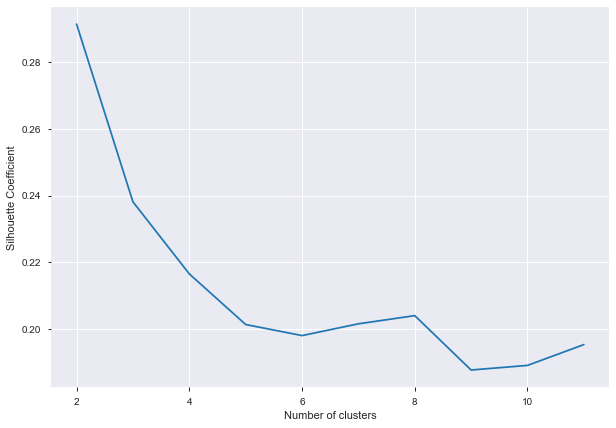

In [184]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 6 based on the SC score. If we take highest SC score, 6 segment solution is best

### Elbow Analysis 

In [185]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( clu_data )
    cluster_errors.append( clusters.inertia_ )

In [186]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,15929.689537
1,3,13640.073105
2,4,12337.573723
3,5,11419.531176
4,6,10875.552191
5,7,10343.019673
6,8,9886.158179
7,9,9627.255406
8,10,9287.178068
9,11,8989.174081


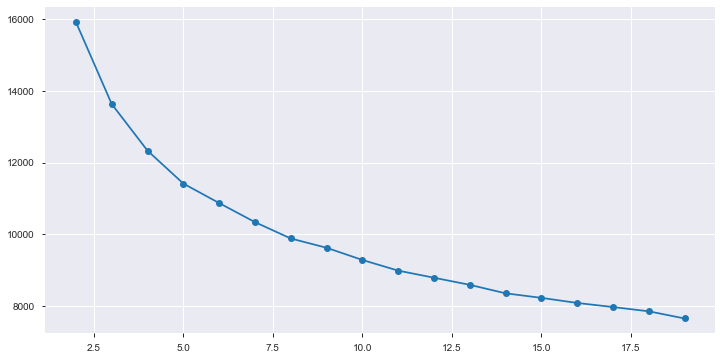

In [187]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 4 to 7. So, optimal number of clusters could either 5 or 6. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

## Profiling

In [188]:
size = pd.concat([pd.Series(data.cluster_3.size), pd.Series.sort_index(data.cluster_3.value_counts()), pd.Series.sort_index(data.cluster_4.value_counts()),
           pd.Series.sort_index(data.cluster_5.value_counts()), pd.Series.sort_index(data.cluster_6.value_counts()),
           pd.Series.sort_index(data.cluster_7.value_counts())])

In [189]:
Seg_size = pd.DataFrame(size, columns = ['Seg_size'])
Seg_Pct = pd.DataFrame(size / data.cluster_3.size, columns = ['Seg_Pct'])

In [190]:
pd.concat([Seg_size.T, Seg_Pct.T], axis = 0)

,0,0,1,2,0,1,2,3,0,1,...,3,4,5,0,1,2,3,4,5,6
Seg_size,7043.0,2162.000000,3099.000000,1782.000000,2230.000000,1608.000000,1295.000000,1910.000000,1692.000000,1534.000000,...,1391.000000,783.000000,1107.000000,699.000000,1100.000000,1534.000000,1208.000000,609.000000,1112.000000,781.00000
Seg_Pct,1.0,0.306971,0.440011,0.253017,0.316626,0.228312,0.183871,0.271191,0.240239,0.217805,...,0.197501,0.111174,0.157177,0.099247,0.156183,0.217805,0.171518,0.086469,0.157887,0.11089


In [191]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data.apply(lambda x: x.mean()).T, 
                             data.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                             data.groupby('cluster_4').apply(lambda x: x.mean()).T,
                             data.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                             data.groupby('cluster_6').apply(lambda x: x.mean()).T,
                             data.groupby('cluster_7').apply(lambda x: x.mean()).T], axis = 1)


In [192]:
Profling_output_final = pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis = 0)

In [193]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7']

In [194]:
Profling_output_final.head()

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7
Seg_size,7043.000000,2162.000000,3099.000000,1782.000000,2230.000000,1608.000000,1295.000000,1910.000000,1692.000000,1534.000000,...,1391.000000,783.000000,1107.000000,699.000000,1100.000000,1534.000000,1208.000000,609.000000,1112.000000,781.000000
Seg_Pct,1.000000,0.306971,0.440011,0.253017,0.316626,0.228312,0.183871,0.271191,0.240239,0.217805,...,0.197501,0.111174,0.157177,0.099247,0.156183,0.217805,0.171518,0.086469,0.157887,0.110890
Churn,0.265370,0.163737,0.418845,0.121773,0.513901,0.092040,0.129730,0.213089,0.537825,0.074967,...,0.283968,0.164751,0.517615,0.114449,0.519091,0.074967,0.494205,0.019704,0.328237,0.165173
Contract_One year,0.209144,0.254857,0.173927,0.214927,0.114798,0.229478,0.270270,0.260733,0.057920,0.237288,...,0.201294,0.326948,0.181572,0.726753,0.177273,0.237288,0.067881,0.000000,0.062050,0.326504
Contract_Two year,0.240664,0.287697,0.139077,0.360269,0.016592,0.396766,0.558301,0.155497,0.019504,0.415906,...,0.038821,0.467433,0.035230,0.000000,0.033636,0.415906,0.020695,0.975369,0.033273,0.466069


In [195]:
Profling_output_final.to_csv('Profiling_output.csv')

# Final Conclusions

#### These are the final key factors that helps in prediction of churn customers
'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines', 'OnlineSecurity',
 'PaperlessBilling', 'PaymentMethod_Electronic check', 'PhoneService', 'StreamingMovies', 'TechSupport', 'tenure_Tenure_12-24',
 'tenure_Tenure_24-48', 'tenure_Tenure_48-60', 'tenure_Tenure_gt_60', 'PaymentMethod_Credit card (automatic)', 'TotalCharges',
 'MonthlyCharges', 'Dependents', 'SeniorCitizen', 'Partner'

#### And these are final key factors that helps in clusterig and helps to determine offers for customers
'Contract_One year', 'Contract_Two year', 'PaperlessBilling', 'PaymentMethod_Credit card (automatic)',
            'TechSupport', 'StreamingTV', 'Dependents', 'InternetService_Fiber optic', 'MonthlyCharges', 'OnlineSecurity',
            'OnlineBackup', 'InternetService_No', 'SeniorCitizen'

### Most of the models give score between 70-80 % and accuracy between 70-80 but Random Forest Model and XGBOOST Model give best result

#### As we select cluster 6 so we can give these offers to our customers to encourage them to remain with company
- Cluster 1 -> They only use some internet services so we can give offers, 1 0r 2 year contract with online security, online streaming or device protection along with better internet offers, we can give them offer related to onlone billing.

- Cluster 2 -> Contract customers comes in this cluster without internet services, so we can give contract extension offers along with some internet services like paperlessbilling, online backup, etc

- Cluster 3 -> These customers are 'internet savvy', so we can give contract extension offers with fiber optics service to engage them more.

- Cluster 4 -> These cluster customer are more likely to leave the company because they don't use any services, so we are more concerned about them, so we can give them low cost offers for onlinebilling along with internet or may be 1 or 2 year contract in low cost with offers contain internet services, fiberoptics etc.

- Cluster 5 -> These customers are 'internet geek', so we can give better offer in contract as they are from long time with company], them that's it

- Cluster 6 -> We can give more offers related to contract as they are from long time with company along with online security, or online backup